In [ ]:
!pip install ucimlrepo

In [ ]:

from ucimlrepo import fetch_ucirepo

# fetch dataset
glass_identification = fetch_ucirepo(id=42)

# data (as pandas dataframes)
X = glass_identification.data.features
y = glass_identification.data.targets
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [ ]:
y.head()

,Type_of_glass
0,1
1,1
2,1
3,1
4,1


In [ ]:
y.value_counts()

Type_of_glass
2                76
1                70
7                29
3                17
5                13
6                 9
Name: count, dtype: int64

In [ ]:
X.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


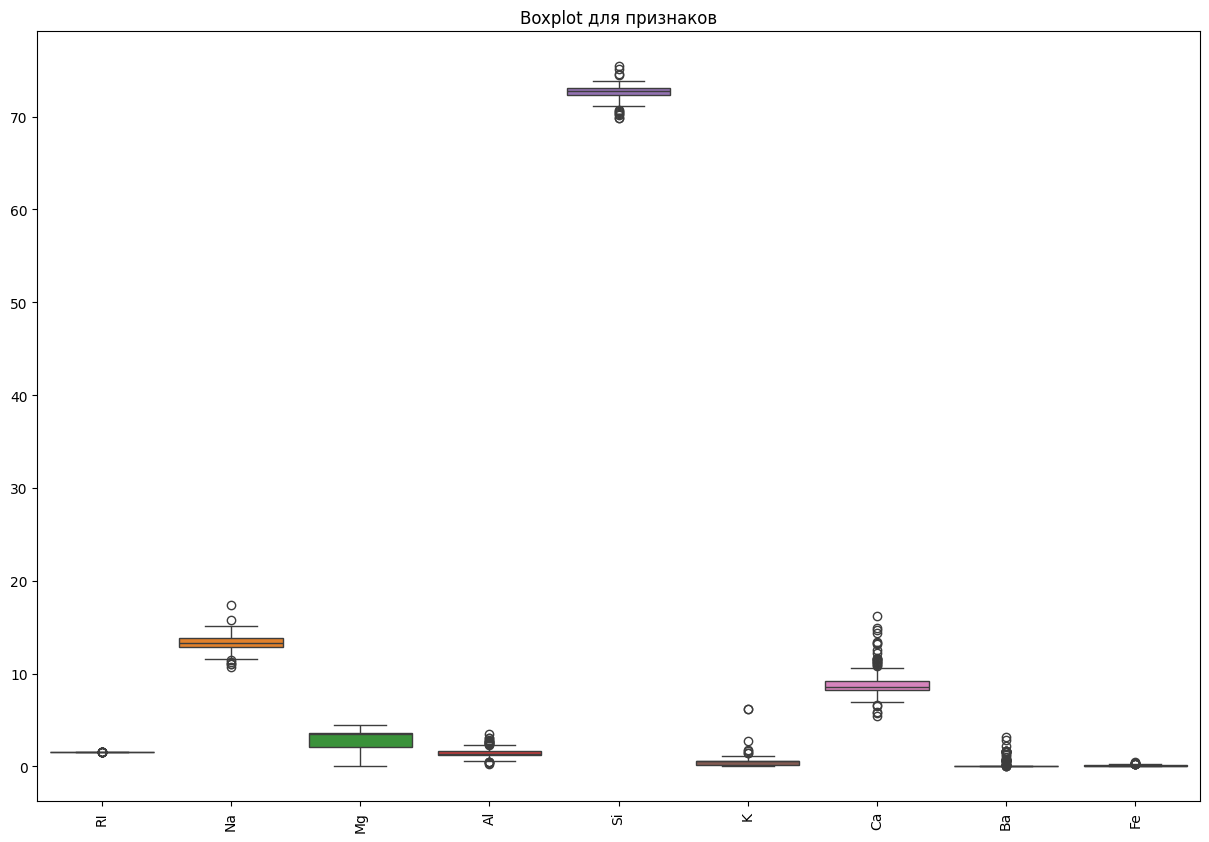

In [ ]:

!pip install matplotlib
!pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Построение boxplot для каждого столбца в X
plt.figure(figsize=(15, 10))
sns.boxplot(data=X)
plt.xticks(rotation=90)
plt.title('Boxplot для признаков')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_a

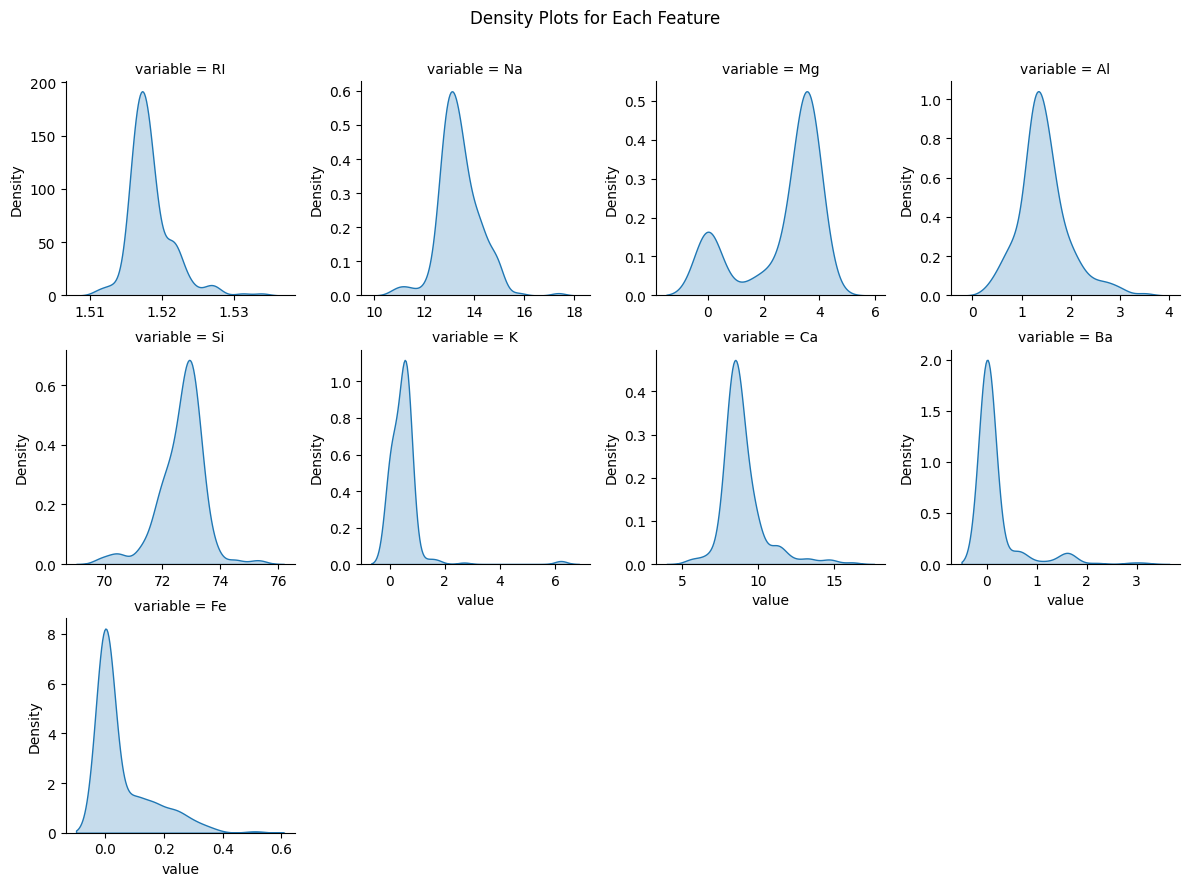

In [ ]:
!pip install pandas
import pandas as pd


data_melted = pd.melt(X)

# Создаем FacetGrid для плотностей признаков
g = sns.FacetGrid(data_melted, col='variable', col_wrap=4, sharex=False, sharey=False)
g.map(sns.kdeplot, 'value', shade=True)

# Настраиваем и отображаем график
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Density Plots for Each Feature')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer
scalers = {
    'RI': StandardScaler(),
    'Na': StandardScaler(),
    'Mg': StandardScaler(),
    'Al': StandardScaler(),
    'Si': RobustScaler(),
    'K': RobustScaler(),
    'Ca': StandardScaler(),
    'Ba': StandardScaler(),
    'Fe': RobustScaler()
}

# Применим скейлеры к соответствующим переменным и изменим их непосредственно в X
for column in X.columns:
    scaler = scalers[column]
    X[column] = scaler.fit_transform(X[[column]])

<ipython-input-57-753081102d73>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = scaler.fit_transform(X[[column]])
<ipython-input-57-753081102d73>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = scaler.fit_transform(X[[column]])
<ipython-input-57-753081102d73>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

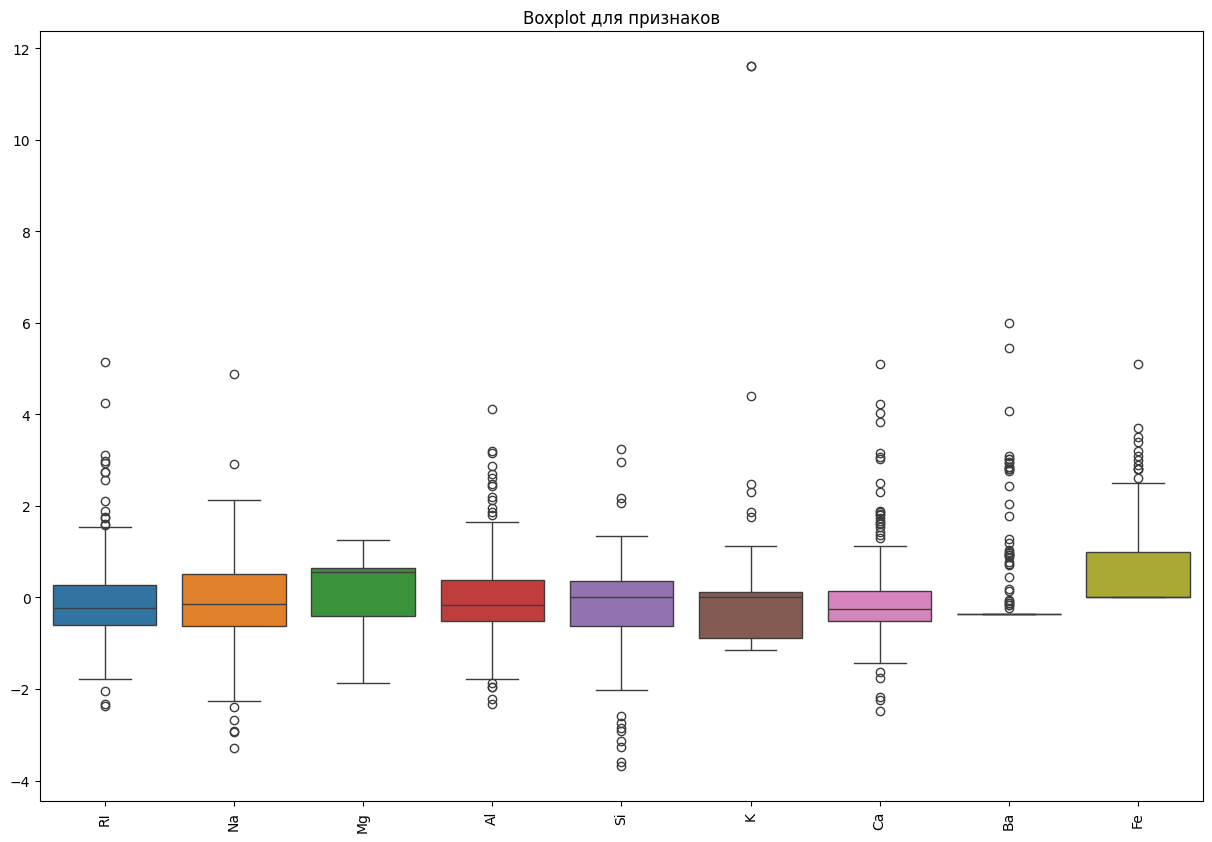

In [ ]:
# Построение boxplot для каждого столбца в X
plt.figure(figsize=(15, 10))
sns.boxplot(data=X)
plt.xticks(rotation=90)
plt.title('Boxplot для признаков')
plt.show()

<Axes: >

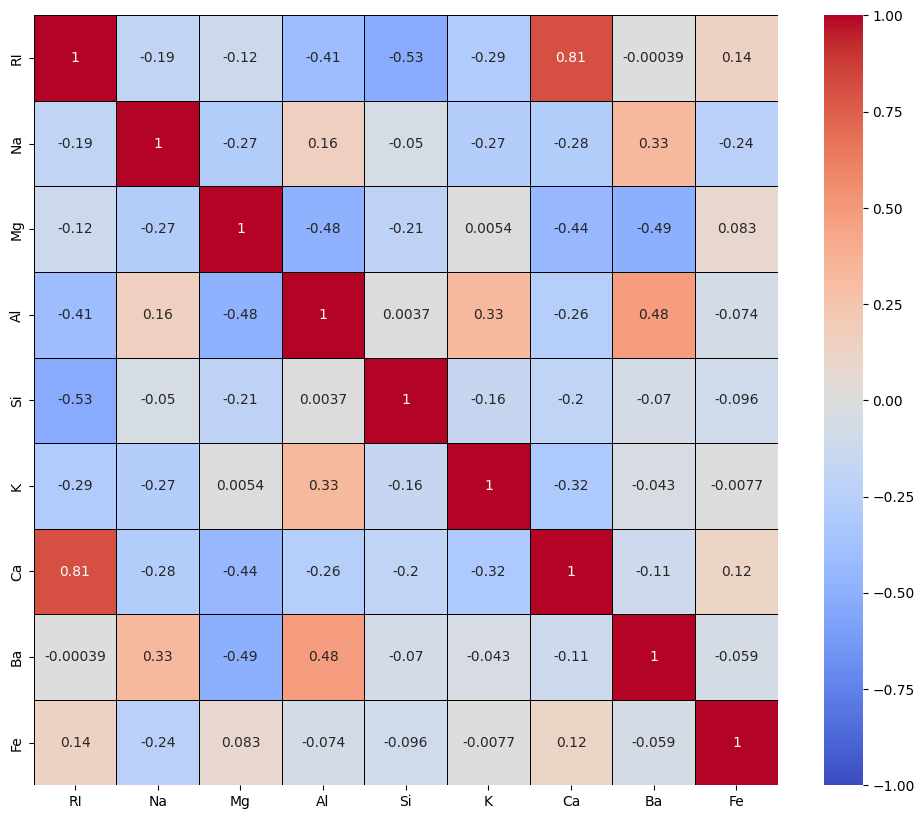

In [ ]:
correlation_matrix = X.corr()

# Создание тепловой карты корреляционной матрицы
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='black')

In [ ]:
X['Ri_Ca'] = 0.55 * X['RI'] + 0.45 * X['Ca']

# Удаляем старые признаки
X.drop(columns=['RI', 'Ca'], inplace=True)

<ipython-input-58-cc7e57f5ce39>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Ri_Ca'] = 0.55 * X['RI'] + 0.45 * X['Ca']
<ipython-input-58-cc7e57f5ce39>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['RI', 'Ca'], inplace=True)


<ipython-input-59-b77952d880dd>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X, y)


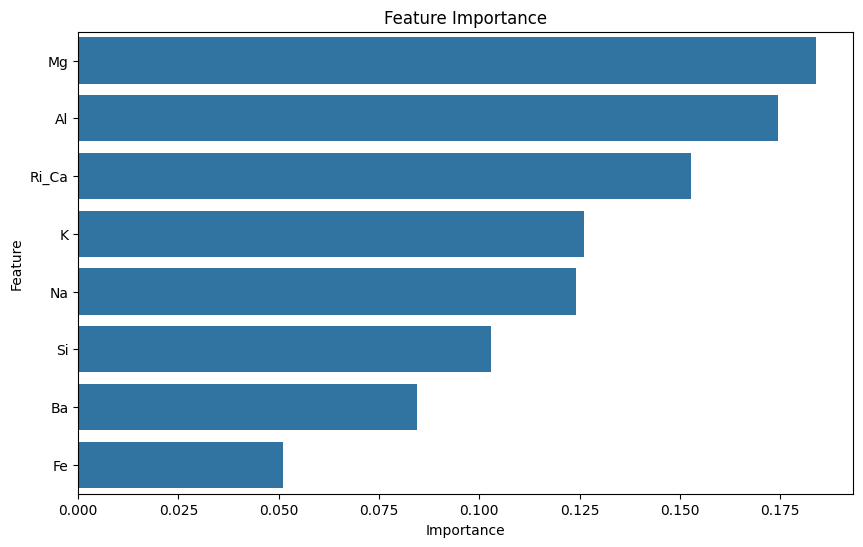

In [ ]:
# Обучим модель случайного леса
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

# Получим важность признаков
feature_importances = clf.feature_importances_

# Создадим DataFrame для удобства визуализации
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Отсортируем DataFrame по важности признаков
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Визуализируем важность признаков
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importance')
plt.show()


In [ ]:
X.shape


(214, 9)

In [ ]:
import numpy as np
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(contamination=0.1)  # 10% данных считаются выбросами
iso_forest.fit(X)

# Определяем, какие точки являются выбросами
outliers = iso_forest.predict(X)
outliers = pd.Series(outliers).map({1: False, -1: True})  # True - выбросы, False - нормальные точки

# Функция для замены выбросов на границы
def replace_outliers_with_bounds(df, outliers):
    for column in df.columns:
        lower_bound = df[column].quantile(0.05)
        upper_bound = df[column].quantile(0.95)
        df.loc[outliers, column] = np.where(
            df.loc[outliers, column] < lower_bound, lower_bound,
            np.where(df.loc[outliers, column] > upper_bound, upper_bound, df.loc[outliers, column])
        )
    return df

# Заменяем выбросы на границы
df_cleaned = replace_outliers_with_bounds(X.copy(), outliers)



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
print(X.describe())
print(df_cleaned.describe())

                 Na            Mg            Al          Si           K  \
count  2.140000e+02  2.140000e+02  2.140000e+02  214.000000  214.000000   
mean   2.191393e-15 -1.328117e-16 -2.988264e-16   -0.172217   -0.118859   
std    1.002345e+00  1.002345e+00  1.002345e+00    0.959190    1.337829   
min   -3.286943e+00 -1.865511e+00 -2.318616e+00   -3.690402   -1.138462   
25%   -6.141580e-01 -3.957744e-01 -5.117560e-01   -0.631579   -0.887179   
50%   -1.323817e-01  5.527787e-01 -1.704602e-01    0.000000    0.000000   
75%    5.120326e-01  6.361680e-01  3.715977e-01    0.368421    0.112821   
max    4.875637e+00  1.254639e+00  4.125851e+00    3.244582   11.600000   

                 Ba          Fe         Ri_Ca  
count  2.140000e+02  214.000000  2.140000e+02  
mean  -6.640586e-17    0.570093 -1.597891e-14  
std    1.002345e+00    0.974387  9.541507e-01  
min   -3.528768e-01    0.000000 -2.398626e+00  
25%   -3.528768e-01    0.000000 -4.966479e-01  
50%   -3.528768e-01    0.000000 -2.4

<ipython-input-41-b3be7393b063>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(df_cleaned, y)


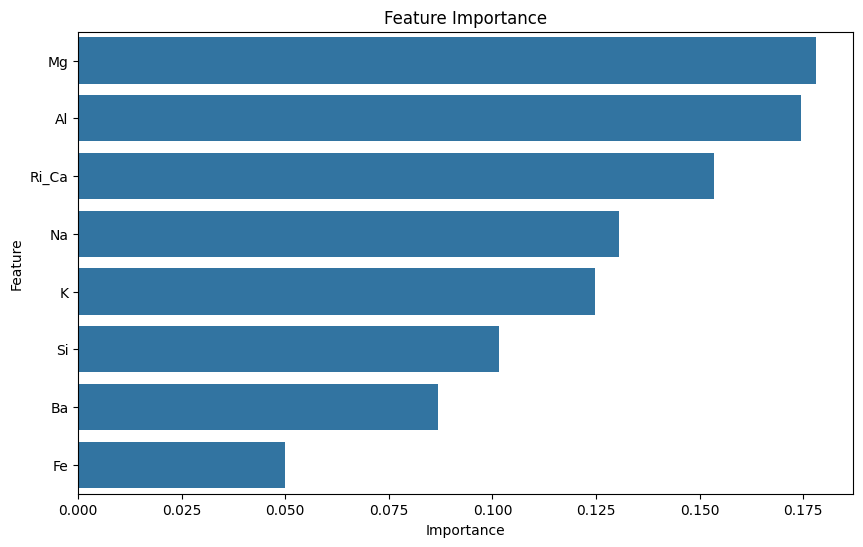

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(df_cleaned, y)

# Получим важность признаков
feature_importances = clf.feature_importances_

# Создадим DataFrame для удобства визуализации
feature_importances_df = pd.DataFrame({
    'Feature': df_cleaned.columns,
    'Importance': feature_importances
})

# Отсортируем DataFrame по важности признаков
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Визуализируем важность признаков
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importance')
plt.show()

In [ ]:
df_cleaned.dtypes

Na       float64
Mg       float64
Al       float64
Si       float64
K        float64
Ba       float64
Fe       float64
Ri_Ca    float64
dtype: object

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from sklearn.pipeline import Pipeline

# Модели и гиперпараметры для подбора
models = {
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {
            'classifier__n_estimators': [50, 100],
            'classifier__max_depth': [None, 10, 20]
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
            'classifier__C': [0.1, 1, 10],
            'classifier__gamma': [1, 0.1, 0.01]
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'classifier__n_neighbors': [3, 5, 7]
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'classifier__C': [0.1, 1, 10]
        }
    }
}

# Методы балансировки
balancers = {
    'SMOTE': SMOTE(),
    'ADASYN': ADASYN(),
    'RandomOverSampler': RandomOverSampler()
}

# Кросс-валидация
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Результаты
results = []

# Цикл по моделям и методам балансировки
for balancer_name, balancer in balancers.items():
    try:
        X_balanced, y_balanced = balancer.fit_resample(df_cleaned, y)

        # Разделение сбалансированных данных на тренировочные и тестовые
        X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)

        for model_name, model_info in models.items():
            pipeline = Pipeline(steps=[
                ('classifier', model_info['model'])
            ])
            grid = GridSearchCV(
                pipeline,
                param_grid=model_info['params'],
                cv=cv,
                scoring='accuracy',
                n_jobs=-1,
            )
            grid.fit(X_train, y_train)  # Заменили y_train.to_numpy().ravel() на y_train

            best_params = grid.best_params_
            best_score = grid.best_score_
            results.append({
                'model': model_name,
                'balancer': balancer_name,
                'best_params': best_params,
                'best_score': best_score
            })
            print(f"Model: {model_name}, Balancer: {balancer_name}, Best Score: {best_score}")
            print("Best Parameters:", best_params)

            # Оценка на тестовом наборе
            pipeline.set_params(**best_params)
            pipeline.fit(X_train, y_train)
            y_pred = pipeline.predict(X_test)
            print(f"Model: {model_name}, Balancer: {balancer_name}")
            print(classification_report(y_test, y_pred))

    except ValueError as e:
        print(f"Error with balancer {balancer_name}: {e}")

# Создание DataFrame с результатами
results_df = pd.DataFrame(results)
print(results_df)


/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Model: RandomForest, Balancer: SMOTE, Best Score: 0.8682267884322679
Best Parameters: {'classifier__max_depth': None, 'classifier__n_estimators': 100}
Model: RandomForest, Balancer: SMOTE
              precision    recall  f1-score   support

           1       0.79      0.73      0.76        15
           2       0.92      0.80      0.86        15
           3       0.76      0.87      0.81        15
           5       1.00      0.94      0.97        16
           6       1.00      1.00      1.00        16
           7       0.88      1.00      0.94        15

    accuracy                           0.89        92
   macro avg       0.89      0.89      0.89        92
weighted avg       0.89      0.89      0.89        92



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: SVM, Balancer: SMOTE, Best Score: 0.8544901065449011
Best Parameters: {'classifier__C': 10, 'classifier__gamma': 1}
Model: SVM, Balancer: SMOTE
              precision    recall  f1-score   support

           1       0.78      0.47      0.58        15
           2       0.67      0.80      0.73        15
           3       0.78      0.93      0.85        15
           5       1.00      1.00      1.00        16
           6       1.00      1.00      1.00        16
           7       1.00      1.00      1.00        15

    accuracy                           0.87        92
   macro avg       0.87      0.87      0.86        92
weighted avg       0.87      0.87      0.86        92



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model: KNN, Balancer: SMOTE, Best Score: 0.8104261796042618
Best Parameters: {'classifier__n_neighbors': 3}
Model: KNN, Balancer: SMOTE
              precision    recall  f1-score   support

           1       0.60      0.60      0.60        15
           2       0.80      0.53      0.64        15
           3       0.65      0.87      0.74        15
           5       1.00      1.00      1.00        16
           6       1.00      1.00      1.00        16
           7       1.00      1.00      1.00        15

    accuracy                           0.84        92
   macro avg       0.84      0.83      0.83        92
weighted avg       0.85      0.84      0.83        92



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: LogisticRegression, Balancer: SMOTE, Best Score: 0.750304414003044
Best Parameters: {'classifier__C': 10}
Model: LogisticRegression, Balancer: SMOTE
              precision    recall  f1-score   support

           1       0.56      0.60      0.58        15
           2       0.60      0.20      0.30        15
           3       0.62      0.87      0.72        15
           5       0.88      0.94      0.91        16
           6       1.00      1.00      1.00        16
           7       0.88      1.00      0.94        15

    accuracy                           0.77        92
   macro avg       0.76      0.77      0.74        92
weighted avg       0.76      0.77      0.75        92

Error with balancer ADASYN: No samples will be generated with the provided ratio settings.


/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Model: RandomForest, Balancer: RandomOverSampler, Best Score: 0.920357686453577
Best Parameters: {'classifier__max_depth': 20, 'classifier__n_estimators': 100}
Model: RandomForest, Balancer: RandomOverSampler
              precision    recall  f1-score   support

           1       0.80      0.80      0.80        15
           2       0.92      0.80      0.86        15
           3       0.88      0.93      0.90        15
           5       1.00      1.00      1.00        16
           6       1.00      1.00      1.00        16
           7       0.94      1.00      0.97        15

    accuracy                           0.92        92
   macro avg       0.92      0.92      0.92        92
weighted avg       0.92      0.92      0.92        92



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: SVM, Balancer: RandomOverSampler, Best Score: 0.8791476407914764
Best Parameters: {'classifier__C': 10, 'classifier__gamma': 1}
Model: SVM, Balancer: RandomOverSampler
              precision    recall  f1-score   support

           1       0.82      0.60      0.69        15
           2       0.72      0.87      0.79        15
           3       0.88      0.93      0.90        15
           5       1.00      1.00      1.00        16
           6       1.00      1.00      1.00        16
           7       1.00      1.00      1.00        15

    accuracy                           0.90        92
   macro avg       0.90      0.90      0.90        92
weighted avg       0.90      0.90      0.90        92



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model: KNN, Balancer: RandomOverSampler, Best Score: 0.8460806697108068
Best Parameters: {'classifier__n_neighbors': 3}
Model: KNN, Balancer: RandomOverSampler
              precision    recall  f1-score   support

           1       0.71      0.67      0.69        15
           2       0.82      0.60      0.69        15
           3       0.74      0.93      0.82        15
           5       0.94      1.00      0.97        16
           6       0.94      1.00      0.97        16
           7       1.00      0.93      0.97        15

    accuracy                           0.86        92
   macro avg       0.86      0.86      0.85        92
weighted avg       0.86      0.86      0.85        92

Model: LogisticRegression, Balancer: RandomOverSampler, Best Score: 0.7610730593607304
Best Parameters: {'classifier__C': 10}
Model: LogisticRegression, Balancer: RandomOverSampler
              precision    recall  f1-score   support

           1       0.57      0.53      0.55        15
       

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
